# Imports & setup

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from models import *
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Training

In [10]:
path_pair_img = '../data/photoshoptest_handmade_crop'
dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

In [11]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [12]:
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    model_crop = LeNet().to(device)
    model_crop.load_state_dict(torch.load("./model_crop"))
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_crop.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=100,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_crop, loss_fn, optimizer)

    print("Done!")



CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Done!


In [5]:
torch.save(model_crop.state_dict(), "./model_retrain_crop")

# Test 

In [3]:
model_crop = LeNet().to(device)
model_crop.load_state_dict(torch.load("./model_retrain_crop"))
model_crop.eval()

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

In [4]:
path_pair_img = '../data/photoshoptest_handmade_crop_test'
dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

test_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=100,
    shuffle=False
)

In [5]:
y_true, y_score = test_basic(test_dataloader, model_crop)

In [6]:
performance = get_performance(y_true, y_score)

In [7]:
#output : 
#   [accuracy, 
#   f1, 
#   precision, 
#   recall, 
#   roc_auc, 
#   conf_mat, 
#   fp, 
#   fn, 
#   tp, 
#   tn]
performance

[0.5392895586652314,
 0.5392895586652314,
 0.5392895586652314,
 0.5392895586652314,
 0.8239262666712799,
 array([[  1,   0,   0,   0,   0,   0,   0,   0],
        [  0,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0, 179,   3,   0,  12,   2,   6],
        [  0,   2,  11, 103,   3,  12,  30, 181],
        [  0,   5,   0,  10, 101,   1,   1,  17],
        [  0,   0,  14,   7,   0,   8,   3,   5],
        [  0,   2,  11,  63,  12,   7,  14, 171],
        [  0,   1,  17, 156,   8,  12,  71, 595]], dtype=int64),
 array([  0,  10,  53, 239,  23,  44, 107, 380], dtype=int64),
 array([  0,   0,  23, 239,  34,  29, 266, 265], dtype=int64),
 array([  1,   1, 179, 103, 101,   8,  14, 595], dtype=int64),
 array([1857, 1847, 1603, 1277, 1700, 1777, 1471,  618], dtype=int64)]

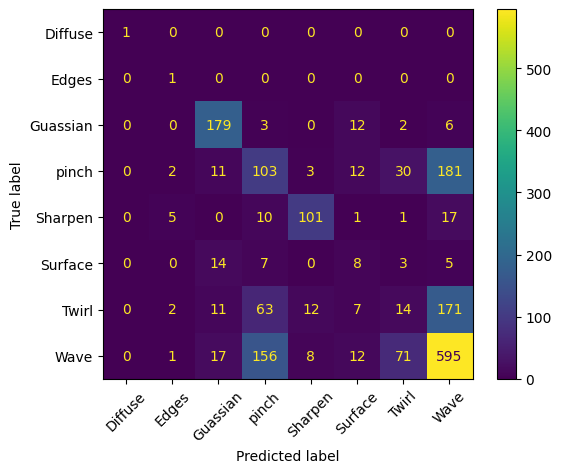

In [8]:
conf_matrix = performance[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()